# Line Plot 
(Choose the top 10 affected countries, and make a line plot, with different colors for each of the countries). Make nice axes with titles. Add text to the plot (we didn’t cover this - try to do it on your own) 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [ ]:
# download data
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
CONFIRMED = pd.read_csv(url)
CONFIRMED.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8


## get a list of top 10 affected countries

In [ ]:
df=pd.DataFrame(CONFIRMED.groupby('Country/Region').sum().reset_index())
df=df.drop(['Lat','Long'],axis=1)
top10=df.sort_values(by=df.columns[-1],ascending=False).head(10)
names=top10['Country/Region'].tolist()
names=['US',
 'Italy',
 'Spain',
 'Germany',
 'China',
 'France',
 'Iran',
 'United Kingdom',
 'Switzerland',
 'Turkey']

## Line plot

<function matplotlib.pyplot.show>

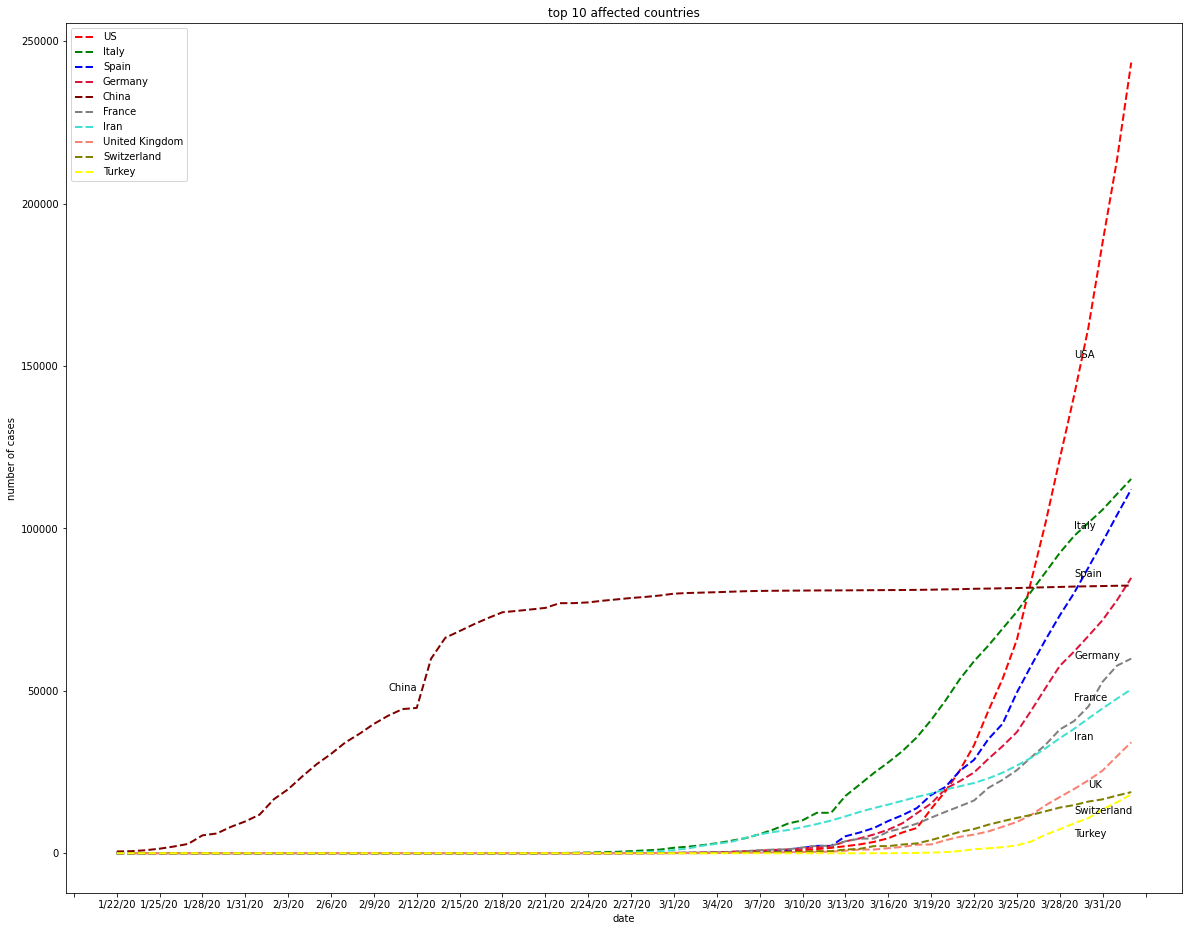

In [ ]:
colors=['Red','Green','Blue','crimson','maroon','Gray','turquoise','salmon','olive','yellow']
plt.figure(figsize=(20,16))
tick_spacing = 3
for n,c in zip(names,colors):
  tmpdata = CONFIRMED[CONFIRMED['Country/Region'] == n]

  # sum down all rows for each column
  sum_CONFIRMED = tmpdata.sum(axis=0)
  sum_CONFIRMED = pd.DataFrame(sum_CONFIRMED)
  sum_CONFIRMED.head()

  # ditch first two rows (LAT and LONG)
  sum_CONFIRMED = sum_CONFIRMED.iloc[4:]
  # rename the column so it's useful
  sum_CONFIRMED.rename(columns={0:'ConfirmedCases'}, inplace=True)
  
  plt.plot('ConfirmedCases', data=sum_CONFIRMED, marker='', color=c, linewidth=2, linestyle='dashed', label=n)

plt.title('top 10 affected countries')
plt.xlabel('date')
plt.ylabel('number of cases')
plt.text(x=19,y=50000,s='China')
plt.text(x=67,y=100000,s='Italy')
plt.text(x=67,y=152560,s='USA')
plt.text(x=67,y=85000,s='Spain')
plt.text(x=67,y=60000,s='Germany')
plt.text(x=67,y=47000,s='France')
plt.text(x=67,y=35000,s='Iran')
plt.text(x=67,y=12000,s='Switzerland')
plt.text(x=68,y=20000,s='UK')
plt.text(x=67,y=5000,s='Turkey')
plt.legend()
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.show

# Bubble Plot 
- the size of the bubble will correspond to the number of Confirmed Cases.

In [ ]:
pip install geopandas

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## prepare data

In [ ]:
# set our file path to the shapefile
fp = '/content/drive/My Drive/Python课/week 10/tl_2019_us_state/tl_2019_us_state.shp'
USA = gpd.read_file(fp)

# download a list of States and Regions from gitub
url = 'https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv'
lower48 = pd.read_csv(url)

# let's rename a column
lower48.rename(columns = {'State Code' : 'STUSPS'}, inplace= True)

# now we can merge this .csv with a shapefile (.shp)
USA = USA.merge(lower48, on='STUSPS')

# let's join the COVID Confirmed Data for the USA
# to this shapefile, and make a map
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/archived_data/archived_time_series/time_series_19-covid-Confirmed_archived_0325.csv'
CONFIRMED = pd.read_csv(url)

# first, subset rows from CONFIRMED that have the US as a country
tmpdata = CONFIRMED[CONFIRMED['Country/Region'] == 'US']

# let's drop the Country/Region, Lat and Long to simplify our df
# keep only the Province/State column and everything after Lat and Long
tmpdata = tmpdata.drop(['Country/Region'], axis=1)

# let's drop all rows where there is a comma in the field for "Province/State"
# return ALL ROWS where it does not contain a comma (that's what ~ means)
tmpdata = tmpdata[~tmpdata['Province/State'].str.contains(",")]

# let's drop the fluff
x = ['Diamond Princess', 
     'Grand Princess', 
     'Puerto Rico', 
     'Guam', 
     'Virgin Islands',
     ]

# give me all rows that are NOT in x (~)
tmpdata = tmpdata[~tmpdata['Province/State'].isin(x)]

# now we can ALMOST do a merge
# first, let's rename the column for easy merging with USA
tmpdata.rename(columns={'Province/State':'NAME'}, inplace=True)

# it's really easy to join together when you have a common field
USA = USA.merge(tmpdata, on='NAME')
USA = USA.sort_values(by=['3/23/20'], ascending=False)

## making bubble map

In [ ]:
import plotly.graph_objects as go
df=USA
df['text'] = df['State'] + '<br>reported ' + (df['3/23/20']).astype(str)
limits = [(0,2),(3,10),(11,20),(21,48)]
colors = ["royalblue","crimson","lightseagreen","orange"]
scale = 5
fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['Long'],
        lat = df_sub['Lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['3/23/20']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = '3/23/20 USA confirmed cases<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

# Colored Table with a graphic on it. 
I am flexible with the values of the colors... but it would be nice to see if you can get this as close as possible!

In [ ]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
CONFIRMED = pd.read_csv(url)
country = pd.DataFrame(CONFIRMED['Country/Region'])
CONFIRMED.drop(CONFIRMED.iloc[:, :-22], axis=1, inplace=True)
df = CONFIRMED.diff(axis=1)
df['total_cases'] = df.sum(axis=1)
df.drop(df.iloc[:, :-22], axis=1, inplace=True)
df = country.merge(df, left_index = True, right_index = True)
df=pd.DataFrame(df.groupby('Country/Region').sum().reset_index())
df.sort_values(by='total_cases', ascending=False, inplace=True)
df.columns = ["Country","D21-7", "D21-6", "D21-5", "D21-4", "D21-3", "D21-2", "D21-1",
                   "D14-7", "D14-6", "D14-5", "D14-4", "D14-3", "D14-2", "D14-1",
                   "D7-7", "D7-6", "D7-5", "D7-4", "D7-3", "D7-2", "D7-1",
                   "total confirmed cases"]
df['total confirmed cases'] = df['total confirmed cases'].astype('object')
for column in df.columns:
  if df[column].dtype == 'float':
    df[column] = df[column].astype('int')
colsLast7 = [('Last7Days', col) for col in df.columns if 'D7-' in col]
colsLast14 = [('Last14Days', col) for col in df.columns if 'D14-' in col]
colsLast21 = [('Last21Days', col) for col in df.columns if 'D21-' in col]
totalStats = [('TotalStats', col) for col in df.columns if 'total' in col]
totalState = [('Countries', col) for col in df.columns if 'Country' in col]
th_props = [
  ('font-size', '12px'),
  ('text-align', 'left'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '11px')
  ]
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

df.columns = pd.MultiIndex.from_tuples(totalState + colsLast21 + colsLast14 + colsLast7 + totalStats)
df = df.style.background_gradient(cmap='Reds', axis=1).set_table_styles([{'selector': 'th', 
                                        'props': [('font-size', '10pt')]}]).set_table_styles(styles)
df